In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numba import jit, njit
# for parallel programming

In [2]:
np.random.seed(1234)
index = pd.date_range("10/1/1999", periods=1100)
ts = pd.Series(np.random.normal(0.5, 2, 1100), index)
ts = ts.rolling(window=100, min_periods=100).mean().dropna()
#dropna drop rows or column which have null vlaues
#randomly arrange the value 
# np.random.normal(0.5,2,10)

In [3]:

index


DatetimeIndex(['1999-10-01', '1999-10-02', '1999-10-03', '1999-10-04',
               '1999-10-05', '1999-10-06', '1999-10-07', '1999-10-08',
               '1999-10-09', '1999-10-10',
               ...
               '2002-09-25', '2002-09-26', '2002-09-27', '2002-09-28',
               '2002-09-29', '2002-09-30', '2002-10-01', '2002-10-02',
               '2002-10-03', '2002-10-04'],
              dtype='datetime64[ns]', length=1100, freq='D')

In [4]:

grouped = ts.groupby(lambda x: x.year)
grouped.mean()
# grouped.std()

2000    0.616392
2001    0.495943
2002    0.372166
dtype: float64

In [5]:
transformed = ts.groupby(lambda x: x.year).transform(
                        lambda x: (x - x.mean()) / x.std())
grouped_trans = transformed.groupby(lambda x: x.year)
#The transform method returns an object 
#that is indexed the same (same size) as the one being grouped
grouped_trans.mean()


2000   -2.721438e-17
2001    2.229571e-16
2002    9.939903e-17
dtype: float64

In [6]:
compare = pd.DataFrame({"Original": ts, "Transformed": transformed})
compare

,Original,Transformed
2000-01-08,0.570225,-0.372328
2000-01-09,0.566620,-0.401398
2000-01-10,0.601770,-0.117921
2000-01-11,0.583188,-0.267782
2000-01-12,0.595147,-0.171337
...,...,...
2002-09-30,0.099543,-2.138066
2002-10-01,0.087771,-2.230385
2002-10-02,0.076343,-2.320011
2002-10-03,0.098357,-2.147365


<AxesSubplot:>

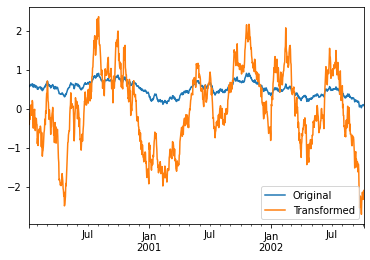

In [7]:
compare.plot()

In [8]:
df_re = pd.DataFrame({"A": [1] * 10 + [5] * 10, "B": np.arange(20)})
df_re.groupby(["A"]).expanding().sum().head(4)

B
A       
1 0  0.0
  1  1.0
  2  3.0
  3  6.0

In [9]:
sf=pd.Series(np.arange(2,20))
sf.groupby([sf]).filter(lambda x:x.sum()>10,dropna=False)
#The filter method returns a subset of the original object. Suppose 
#we want to take only elements that belong to
#groups with a group sum greater than 10.

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9     11.0
10    12.0
11    13.0
12    14.0
13    15.0
14    16.0
15    17.0
16    18.0
17    19.0
dtype: float64

In [10]:
grouped_trans.apply(lambda x:x.describe())
#Some operations on the grouped data might not fit into either the aggregate or transform categories. 
#Or, you may simply
#want GroupBy to infer how to combine the results. 
#For these, use the apply function, which can be substituted for both
#aggregate and transform in many standard use cases. However, 
#apply can handle some exceptional use cases, for
#example:

2000  count    3.590000e+02
      mean     0.000000e+00
      std      1.000000e+00
      min     -2.486725e+00
      25%     -6.350667e-01
      50%      2.548111e-02
      75%      7.236842e-01
      max      2.362403e+00
2001  count    3.650000e+02
      mean     1.946692e-16
      std      1.000000e+00
      min     -1.977395e+00
      25%     -7.460023e-01
      50%      5.150435e-03
      75%      7.768001e-01
      max      2.166472e+00
2002  count    2.770000e+02
      mean     1.026054e-16
      std      1.000000e+00
      min     -2.703015e+00
      25%     -6.650818e-01
      50%     -3.166215e-02
      75%      8.789301e-01
      max      2.075495e+00
dtype: float64

In [11]:
def sum_and_mean_function(group):
    return pd.DataFrame({'original': group,
'demeaned': group - group.mean()})

In [12]:
grouped_trans.apply(sum_and_mean_function)

,original,demeaned
2000-01-08,-0.372328,-0.372328
2000-01-09,-0.401398,-0.401398
2000-01-10,-0.117921,-0.117921
2000-01-11,-0.267782,-0.267782
2000-01-12,-0.171337,-0.171337
...,...,...
2002-09-30,-2.138066,-2.138066
2002-10-01,-2.230385,-2.230385
2002-10-02,-2.320011,-2.320011
2002-10-03,-2.147365,-2.147365


In [13]:
#category
new_data_frame=pd.Series(np.arange(50,90,4.8)).groupby(pd.Categorical(["a","a","c","l","b","a","a","c","b"]
                                                                      ,categories=["a","b"])
                                                       ,observed=True).count()
new_data_frame

a    4
b    2
dtype: int64

In [14]:
grouped_trans.nth(2,dropna="all")

2000   -0.117921
2001   -0.928741
2002    0.321085
dtype: float64

In [18]:
business_dates = pd.date_range(start="4/1/2014", end="6/30/2014", freq="B")

In [26]:
df = pd.DataFrame(1, index=business_dates, columns=["a", "b"])
df.groupby([df.index.year, df.index.month,df.index.weekday]).nth([2, 4, -1])


a  b
2014 4 0  1  1
       0  1  1
       1  1  1
       1  1  1
       2  1  1
       2  1  1
       3  1  1
       3  1  1
       4  1  1
       4  1  1
     5 0  1  1
       0  1  1
       1  1  1
       1  1  1
       2  1  1
       2  1  1
       3  1  1
       3  1  1
       4  1  1
       4  1  1
     6 0  1  1
       0  1  1
       1  1  1
       1  1  1
       2  1  1
       2  1  1
       3  1  1
       3  1  1
       4  1  1
       4  1  1

In [17]:
grouped_trans.cumcount(ascending=True)
#To see the order in which each row appears within its group, use the cumcount method:

2000-01-08      0
2000-01-09      1
2000-01-10      2
2000-01-11      3
2000-01-12      4
             ... 
2002-09-30    272
2002-10-01    273
2002-10-02    274
2002-10-03    275
2002-10-04    276
Freq: D, Length: 1001, dtype: int64

In [41]:
dff = pd.DataFrame({"A": np.arange(8), "B": list("aabbbbcc")})
dff.apply(lambda x:x.describe())
#Some operations on the grouped data might not fit into either the aggregate or transform categories.
#Or, you may simply
#want GroupBy to infer how to combine the results. For these, use the apply function,
#which can be substituted for both
#aggregate and transform in many standard use cases. However, 
#apply can handle some exceptional use cases, for


,A,B
25%,1.75000,NaN
50%,3.50000,NaN
75%,5.25000,NaN
count,8.00000,8
freq,NaN,4
max,7.00000,NaN
mean,3.50000,NaN
min,0.00000,NaN
std,2.44949,NaN
top,NaN,b


In [59]:
def f(group):
    return pd.DataFrame({"original":group,"demanded":group})
#filtering the data 
# filter will take an function argumnet and return values 
# in this case lambda function
dff.groupby("B").filter(lambda x: len(x) > 2,dropna=False)




,A,B
0,NaN,NaN
1,NaN,NaN
2,2.0,b
3,3.0,b
4,4.0,b
5,5.0,b
6,NaN,NaN
7,NaN,NaN


hjhhl
